In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_excel("dataset.xlsx")
data

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667
3,android-permission-handler-master,1,1,1,6,0.0,2.1,0.083333,1.000000,4.250000,18.757143,3.385714,3.019608,2.333333,8.833333,3.314286,1.666667
4,Android-WhatsApp-master,0,6,0,253,3.4,4.2,0.036145,2.843373,2.120482,46.416898,16.549861,7.336918,5.704301,10.913580,11.076696,0.903614
5,android-youtubeExtractor-master,4,18,7,100,3.8,3.1,0.200000,1.880000,6.720000,43.434783,2.920290,3.908163,5.020408,18.826090,8.260870,1.840000
6,androidtv-sample-inputs-master,15,3,0,155,3.0,1.0,0.241935,2.491935,8.120968,36.534765,11.452965,3.972868,4.281654,23.250000,5.811861,1.580645
7,BirthdayBuddy-master,1,0,0,69,1.0,0.2,0.000000,0.000000,0.000000,52.708333,1.708333,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,34,306,43,2000,10.1,1.7,0.500824,3.654036,7.975288,41.952099,5.579882,5.454865,4.075811,17.238180,9.152676,1.507414
9,epubator-master,0,12,8,134,0.0,3.0,0.255319,2.180851,6.063830,19.005579,2.112971,2.749027,3.050584,16.319150,3.418410,1.127660


In [3]:
data.describe()

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
count,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,10.86000,19.200000,7.640000,264.960000,2.43400,2.200000,0.190633,1.673476,5.316082,30.018492,4.809944,3.180646,3.801251,18.156022,5.035829,1.539186
std,18.86581,53.932687,11.286184,445.697708,4.13993,2.253342,0.174185,0.771521,3.719509,9.635218,3.793282,1.259158,1.173664,9.031752,2.373543,0.422771
min,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,14.803680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,25.500000,0.00000,0.825000,0.032232,1.161598,2.808333,22.557639,2.130579,2.646222,3.236648,12.386962,3.444926,1.359046
50%,3.50000,3.500000,3.000000,94.000000,1.00000,1.600000,0.188679,1.712209,4.563492,28.209914,3.554900,3.166659,3.903790,17.334280,4.519068,1.602781
75%,11.75000,16.750000,10.750000,279.500000,3.35000,3.075000,0.287612,2.141194,7.103338,36.395764,6.143251,3.534723,4.510027,22.374890,5.732417,1.790429
max,110.00000,306.000000,43.000000,2000.000000,19.80000,12.200000,0.809524,3.654036,24.006329,52.708333,16.549861,7.336918,6.438868,44.000000,11.076696,2.177215


In [4]:
def plotHist(columnName,columnColor):
    data[columnName].plot(kind='hist',color=columnColor)
    plt.title(columnName)
    plt.xlabel(columnName)
    plt.ylabel("Frequency")
    plt.show()

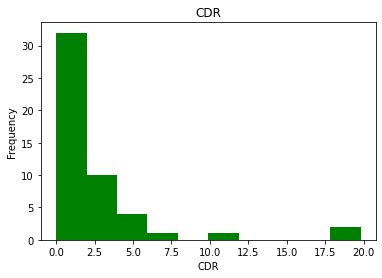

In [5]:
plotHist("CDR","green")

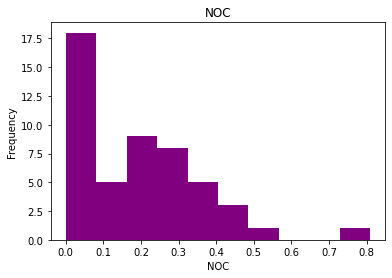

In [6]:
plotHist("NOC","purple")

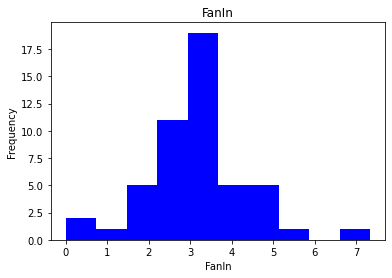

In [7]:
plotHist("FanIn","blue")

In [8]:
scaler = MinMaxScaler()
data.iloc[:,1:16] = scaler.fit_transform(data.iloc[:,1:16])
data.drop('Name', inplace=True, axis=1)
#min max scaler for all the data


In [9]:
#getting the spearman correlation matrix
corr_matrix=data.corr(method="spearman")

In [10]:
corr_matrix #showing the correlation matrix

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [11]:
a,p_values=stats.spearmanr(corr_matrix)

In [12]:
print(p_values)

[[0.00000000e+00 2.67907406e-05 7.18727304e-06 6.09561957e-06
  1.09285081e-03 7.61733079e-01 1.28602985e-02 1.17884051e-02
  3.49520068e-02 2.78984460e-01 8.57758410e-03 2.26045422e-01
  6.96334105e-01 5.71744619e-01 1.87834420e-01 3.98982927e-01]
 [2.67907406e-05 0.00000000e+00 6.32812457e-05 6.32812457e-05
  2.93363375e-02 8.11821451e-01 8.98808926e-03 3.20390861e-03
  1.64868397e-01 5.56861281e-01 8.25369234e-02 1.95932625e-01
  5.94378288e-01 4.44284641e-01 4.11666430e-01 3.38789908e-01]
 [7.18727304e-06 6.32812457e-05 0.00000000e+00 1.14989348e-05
  5.51142234e-03 2.54066881e-01 7.92354858e-05 4.71198195e-03
  2.44365114e-02 9.31073584e-01 6.97436756e-02 6.48542067e-01
  5.56861281e-01 3.21804396e-01 7.37004950e-01 6.97436756e-02]
 [6.09561957e-06 6.32812457e-05 1.14989348e-05 0.00000000e+00
  7.92354858e-05 6.72291047e-01 1.79327341e-02 1.34241254e-02
  1.13033866e-01 1.27806009e-01 1.10229404e-01 1.72303863e-01
  4.64464211e-01 3.80355801e-01 1.40544177e-01 4.24559234e-01]
 [1.

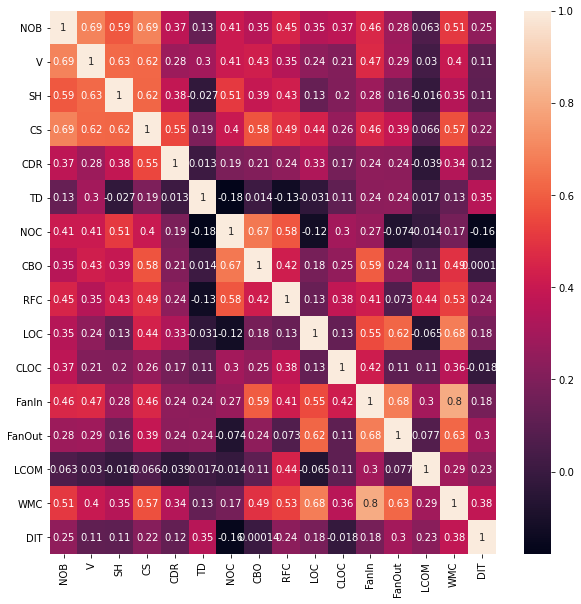

In [13]:
a, b = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=True)

In [14]:
#Correlation between External Metrics & TD values
external_correlation_matrix=data.iloc[:,:6].corr(method="spearman")
external_correlation_matrix

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [15]:
#p values for external
#a,p_values_external=stats.spearmanr(external_correlation_matrix)
#p_values_external

In [16]:
#Correlation matrix between Internal Metrics & TD values
internal_correlation_matrix=data.corr(method="spearman")
internal_correlation_matrix=internal_correlation_matrix.drop(columns=["NOB","V","SH","CS"],inplace=False)
internal_correlation_matrix=internal_correlation_matrix.drop(["NOB","V","SH","CS"],inplace=False)
internal_correlation_matrix

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


In [17]:
#p values for internal
#a,p_values_internal=stats.spearmanr(internal_correlation_matrix)
#p_values_internal

In [18]:
#part 2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
random_state_fixed=53


In [19]:
#function for linear regression
def linearRegressionGraph(X_train,Y_train,X_test,Y_test):
    model = linear_model.LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    plt.title("Accuracy of Linear Regression")
    print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
    print('Coefficient of determination (R^2): %.2f'% r2_score(Y_test, Y_pred))
    sns.scatterplot(Y_test, Y_pred,color="b",label="Results")
    sns.scatterplot(Y_test, Y_test,color="r",label="Original Values")
    

In [20]:
#function for svr regression kernel: linear
def svrRegressionLinear(X_train,Y_train,X_test,Y_test):
    regressor = SVR(kernel='linear')
    regressor.fit(X_train,Y_train)
    Y_pred = regressor.predict(X_test)
    plt.title("Accuracy of SVR Regression Kernel: Linear")
    sns.scatterplot(Y_test, Y_pred,color="b",label="Results")
    sns.scatterplot(Y_test, Y_test,color="r",label="Original Values")
    print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
    print('Coefficient of determination (R^2): %.2f'% r2_score(Y_test, Y_pred))
    r2_score(Y_test, Y_pred)
    r2_score(Y_test, Y_pred).dtype
    sns.scatterplot(Y_test, Y_pred,color="b")
    sns.scatterplot(Y_test, Y_test,color="r")

In [21]:
#function for svr regression kernel: rbf
def svrRegressionRbf(X_train,Y_train,X_test,Y_test):
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train,Y_train)
    Y_pred = regressor.predict(X_test)
    plt.title("Accuracy of SVR Regression Kernel: RBF")
    sns.scatterplot(Y_test, Y_pred,color="b",label="Results")
    sns.scatterplot(Y_test, Y_test,color="r",label="Original Values")
    print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
    print('Coefficient of determination (R^2): %.2f'% r2_score(Y_test, Y_pred))
    r2_score(Y_test, Y_pred)
    r2_score(Y_test, Y_pred).dtype
    sns.scatterplot(Y_test, Y_pred,color="b")
    sns.scatterplot(Y_test, Y_test,color="r")

In [22]:
#function for decision tree regression
def decisionTreeRegression(X_train,Y_train,X_test,Y_test):
    regressor = DecisionTreeRegressor(random_state=53)
    regressor.fit(X_train,Y_train)
    Y_pred = regressor.predict(X_test)
    plt.title("Accuracy of Random Decision Tree Regression")
    sns.scatterplot(Y_test, Y_pred,color="b",label="Results")
    sns.scatterplot(Y_test, Y_test,color="r",label="Original Values")
    print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
    print('Coefficient of determination (R^2): %.2f'% r2_score(Y_test, Y_pred))
    r2_score(Y_test, Y_pred)
    r2_score(Y_test, Y_pred).dtype
    sns.scatterplot(Y_test, Y_pred,color="b")
    sns.scatterplot(Y_test, Y_test,color="r")
    

In [23]:
def randomForestRegression(X_train,Y_train,X_test,Y_test):
    regression = RandomForestRegressor(random_state=53)
    regression.fit(X_train, Y_train)
    Y_pred=regression.predict(X_test)
    plt.title("Accuracy of Random Forest Tree Regression")
    sns.scatterplot(Y_test, Y_pred,color="b",label="Results")
    sns.scatterplot(Y_test, Y_test,color="r",label="Original Values")
    print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
    print('Coefficient of determination (R^2): %.2f'% r2_score(Y_test, Y_pred))
    r2_score(Y_test, Y_pred)
    r2_score(Y_test, Y_pred).dtype
    sns.scatterplot(Y_test, Y_pred,color="b")
    sns.scatterplot(Y_test, Y_test,color="r")


In [24]:
def mlpRegressor(X_train,Y_train,X_test,Y_test):
    regression = MLPRegressor(random_state=53)
    regression.fit(X_train, Y_train)
    Y_pred=regression.predict(X_test)
    plt.title("Accuracy of MultiLayer Perceptron Regression")
    sns.scatterplot(Y_test, Y_pred,color="b",label="Results")
    sns.scatterplot(Y_test, Y_test,color="r",label="Original Values")
    print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
    print('Coefficient of determination (R^2): %.2f'% r2_score(Y_test, Y_pred))
    r2_score(Y_test, Y_pred)
    r2_score(Y_test, Y_pred).dtype
    sns.scatterplot(Y_test, Y_pred,color="b")
    sns.scatterplot(Y_test, Y_test,color="r")
    


In [68]:
#dividing data into parts to use them more efficiently
TD=data.iloc[:,5]
CDR=data.iloc[:,4]
external=data.iloc[:,:4]
all_except_TD=data.drop(columns=["TD","CDR"])
internal=data.iloc[:,6:]

In [26]:
#Step 3 relation of internal and TD&CDR
#splitting the data into test and train data
X_train_td, X_test_td, Y_train_td, Y_test_td = train_test_split(internal, TD, test_size=0.3,random_state=53)
X_train_cdr, X_test_cdr, Y_train_cdr, Y_test_cdr = train_test_split(internal, CDR, test_size=0.3,random_state=53)


Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.17


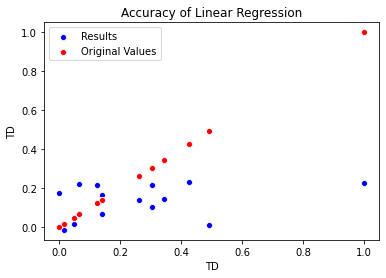

In [27]:
linearRegressionGraph(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.25


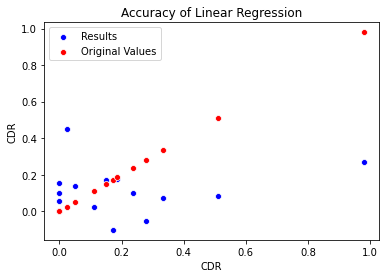

In [28]:
linearRegressionGraph(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.37


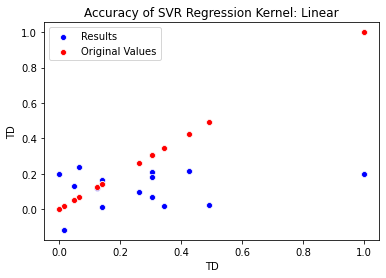

In [29]:
svrRegressionLinear(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.09


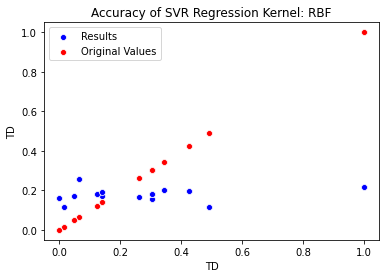

In [30]:
svrRegressionRbf(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.12


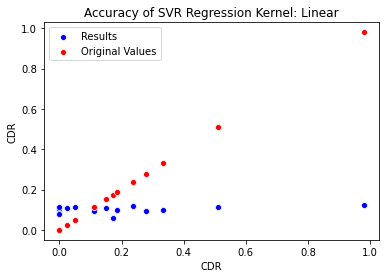

In [31]:
svrRegressionLinear(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.16


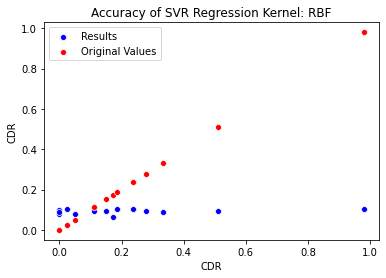

In [32]:
svrRegressionRbf(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.09
Coefficient of determination (R^2): -0.52


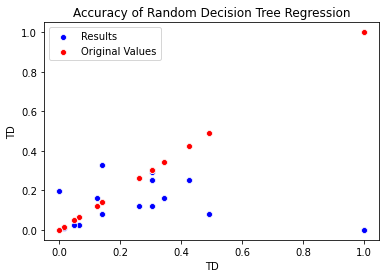

In [33]:
decisionTreeRegression(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.12


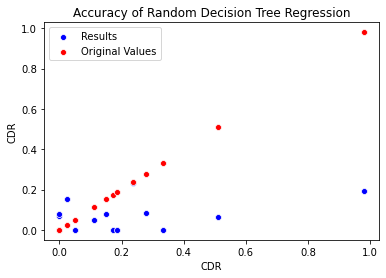

In [34]:
decisionTreeRegression(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.17


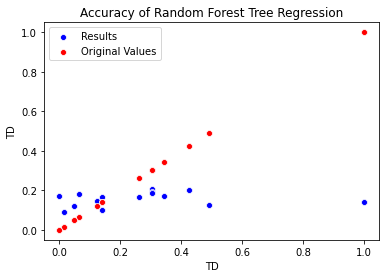

In [35]:
randomForestRegression(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.05


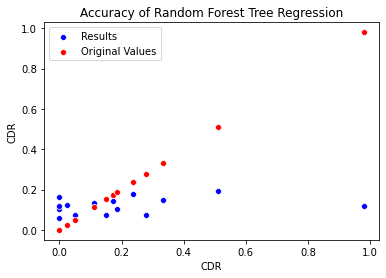

In [36]:
randomForestRegression(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.09
Coefficient of determination (R^2): -0.46


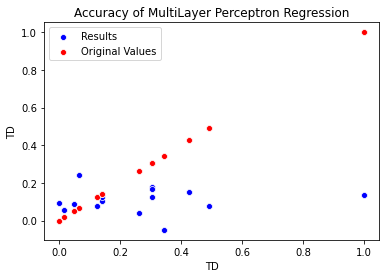

In [37]:
mlpRegressor(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.25


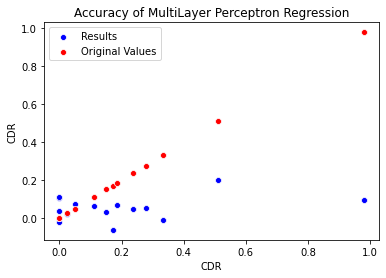

In [38]:
mlpRegressor(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

In [39]:
#Step 4 relation of internal and TD&CDR
#splitting the data into test and train data
X_train_td, X_test_td, Y_train_td, Y_test_td = train_test_split(external, TD, test_size=0.3,random_state=53)
X_train_cdr, X_test_cdr, Y_train_cdr, Y_test_cdr = train_test_split(external, CDR, test_size=0.3,random_state=53)

Mean squared error (MSE): 0.09
Coefficient of determination (R^2): -0.43


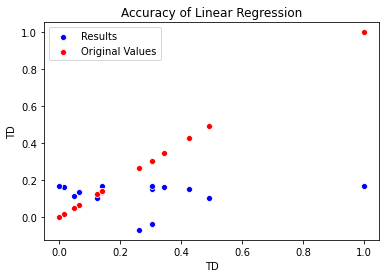

In [40]:
linearRegressionGraph(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.30


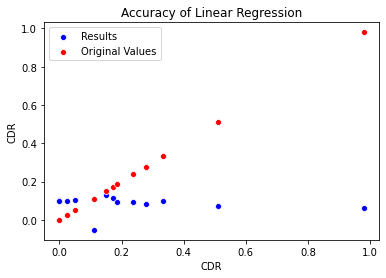

In [41]:
linearRegressionGraph(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.32


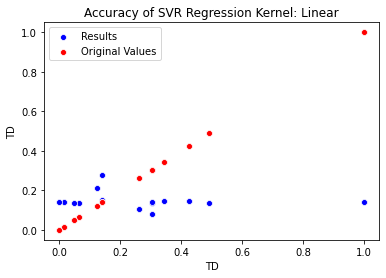

In [42]:
svrRegressionLinear(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.09
Coefficient of determination (R^2): -0.45


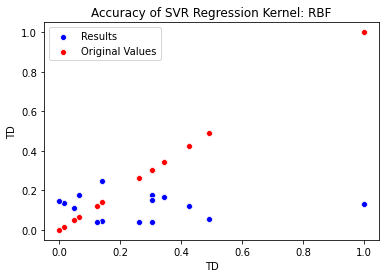

In [43]:
svrRegressionRbf(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.10


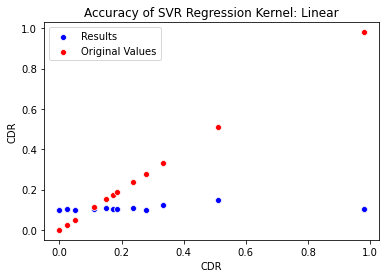

In [44]:
svrRegressionLinear(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.06


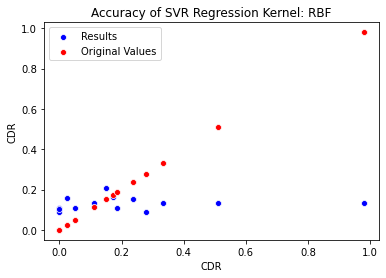

In [45]:
svrRegressionRbf(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.10
Coefficient of determination (R^2): -0.74


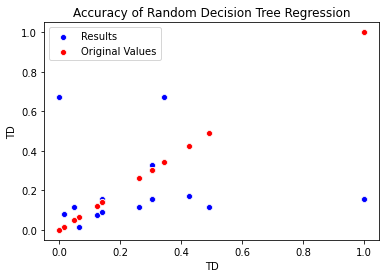

In [46]:
decisionTreeRegression(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.10
Coefficient of determination (R^2): -0.50


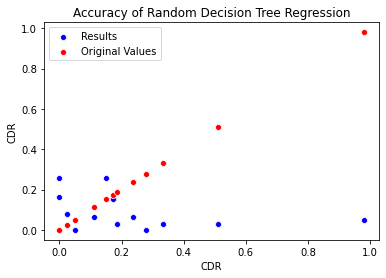

In [47]:
decisionTreeRegression(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.11


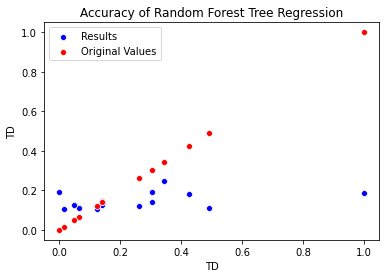

In [48]:
randomForestRegression(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.26


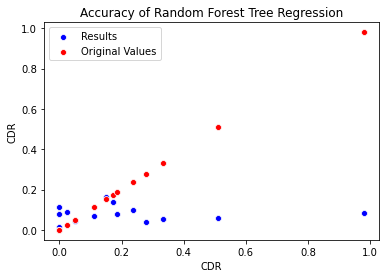

In [49]:
randomForestRegression(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.19


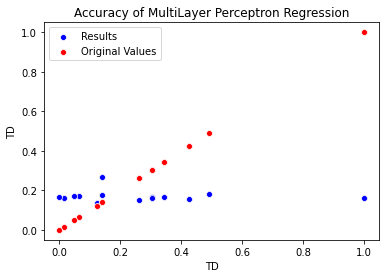

In [50]:
mlpRegressor(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.17


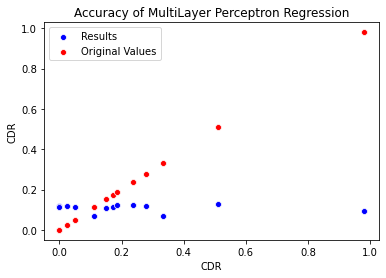

In [51]:
mlpRegressor(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

In [52]:
##Step 5 relation of all except TDmetrics  and TD&CDR
#splitting the data into test and train data
X_train_td, X_test_td, Y_train_td, Y_test_td = train_test_split(all_except_TD, TD, test_size=0.3,random_state=53)
X_train_cdr, X_test_cdr, Y_train_cdr, Y_test_cdr = train_test_split(all_except_TD, CDR, test_size=0.3,random_state=53)

Mean squared error (MSE): 0.06
Coefficient of determination (R^2): -0.00


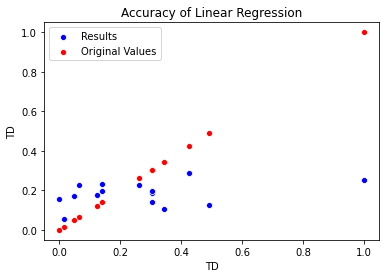

In [53]:
linearRegressionGraph(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.19
Coefficient of determination (R^2): -2.01


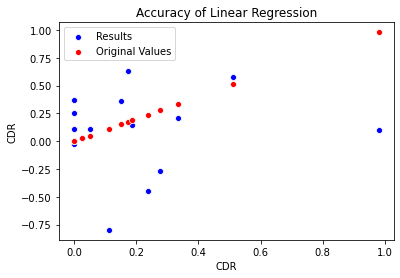

In [54]:
linearRegressionGraph(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.35


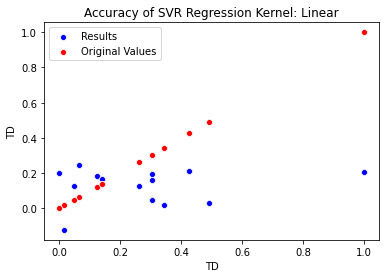

In [55]:
svrRegressionLinear(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.14


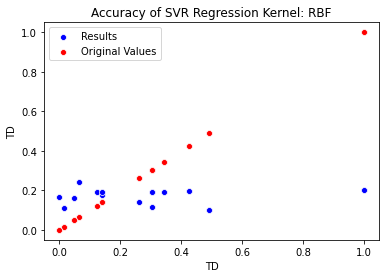

In [56]:
svrRegressionRbf(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.16


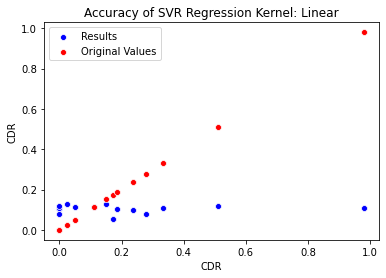

In [57]:
svrRegressionLinear(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.22


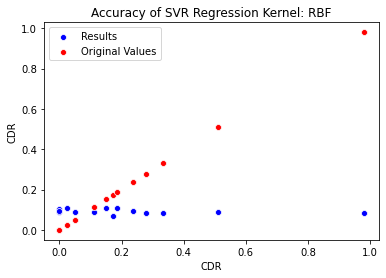

In [58]:
svrRegressionRbf(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.26


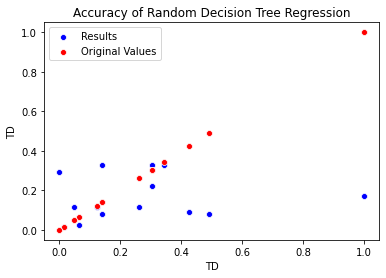

In [59]:
decisionTreeRegression(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): -0.05


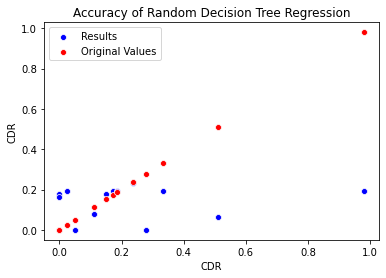

In [60]:
decisionTreeRegression(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.06
Coefficient of determination (R^2): 0.08


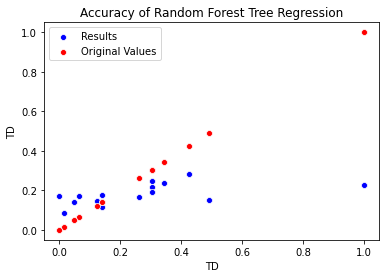

In [61]:
randomForestRegression(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.06
Coefficient of determination (R^2): 0.01


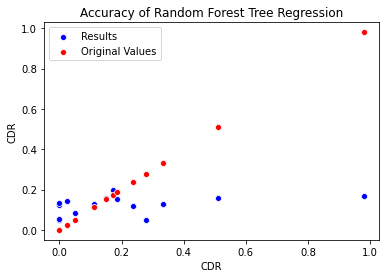

In [62]:
randomForestRegression(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)

Mean squared error (MSE): 0.06
Coefficient of determination (R^2): -0.01


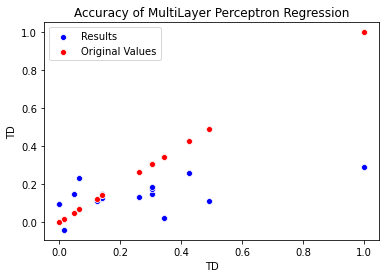

In [63]:
mlpRegressor(X_train_td,Y_train_td,X_test_td,Y_test_td)

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): -0.31


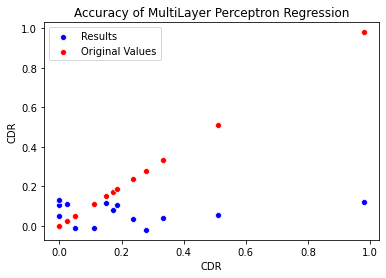

In [64]:
mlpRegressor(X_train_cdr,Y_train_cdr,X_test_cdr,Y_test_cdr)